# Разложение матриц (SVD и PCA)

В этом ноутбуке мы рассмотрим два очень важных метода разложения матриц: 
сингулярное разложение матриц (SVD) и метод главных компонент (PCA). 
Мы используем реальный пример для лучшего понимания.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

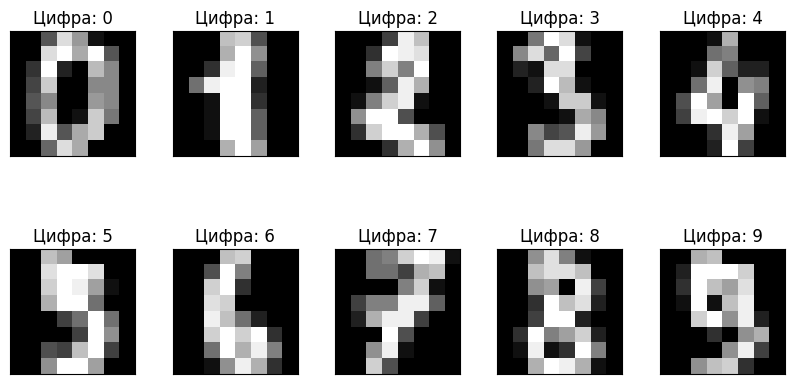

In [2]:
# Реальный пример: Исследование датасета рукописных цифр MNIST
# Загрузим набор данных с изображениями цифр
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Визуализируем несколько изображений из датасета
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.3, wspace=0.3))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Цифра: {digits.target[i]}")
plt.show()

### Сингулярное разложение матриц (SVD)

SVD разложение позволяет представить матрицу A как произведение трех матриц: 
A = UΣVᵀ, где:
- U и V являются ортонормированными матрицами,
- Σ является диагональной матрицей.

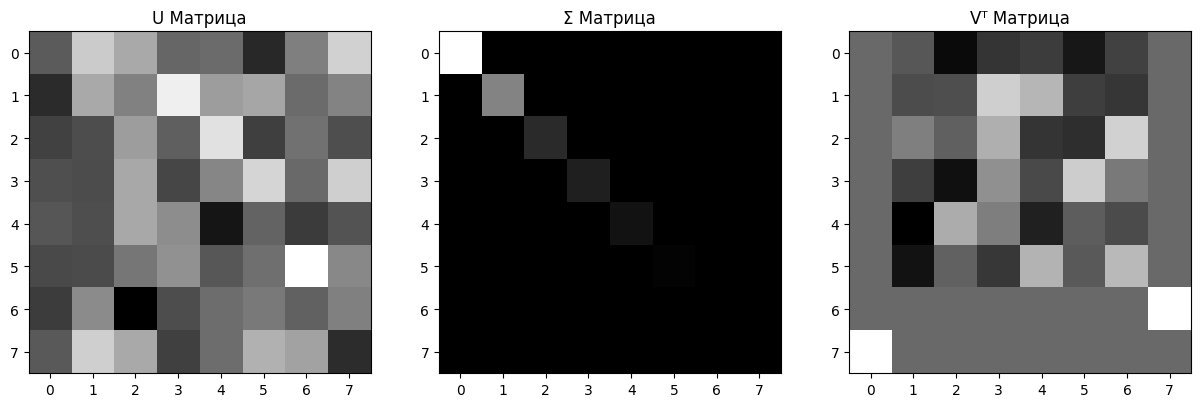

In [3]:
# Применим SVD к первому изображению цифры
A = digits.images[0]

# Вычислим SVD
U, Sigma, VT = np.linalg.svd(A)

# Визуализируем результаты разложения
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(U, cmap='gray')
axes[0].set_title('U Матрица')
axes[1].imshow(np.diag(Sigma), cmap='gray')
axes[1].set_title('Σ Матрица')
axes[2].imshow(VT, cmap='gray')
axes[2].set_title('Vᵀ Матрица')
plt.show()

### Зачем нужно сингулярное разложение матриц (SVD)?

1. **Уменьшение размерности данных:**
   Представим, что у нас есть огромная таблица данных (матрица), и мы хотим сократить количество столбцов (например, для быстроты вычислений или для визуализации). SVD помогает нам найти основные компоненты этих данных, которые всё ещё содержат большую часть информации.

2. **Сжатие данных:**
   SVD используется, чтобы сжимать данные (например, изображения) так, чтобы занимать меньше места, но при этом сохранять большую часть важной информации. Это полезно для хранения данных и их передачи.

3. **Усовершенствование вычислений:**
   В решении различных математических задач, таких как задачи наименьших квадратов, SVD помогает усовершенствовать вычисления и улучшить точность результатов.

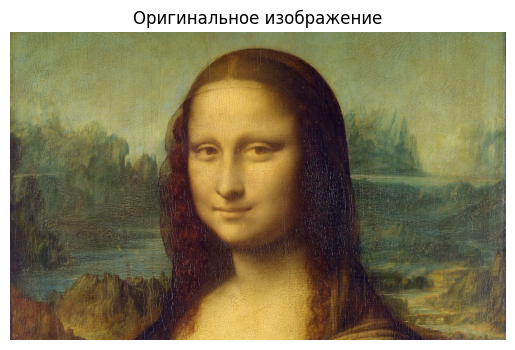

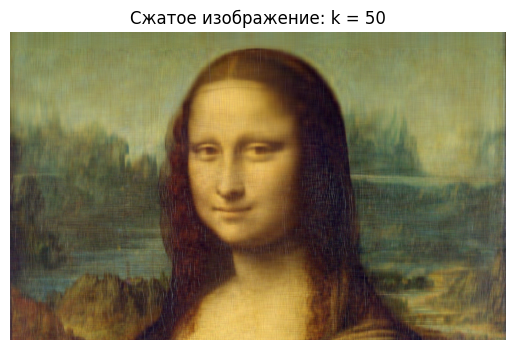

Размер оригинального изображения: 4185000 байт
Размер сжатого изображения (with k=50): 2917200 байт


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Функция для отображения изображения
def display_image(image, title='Image'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Загружаем изображение
def load_image(image_path):
    image = io.imread(image_path)
    return image

# Задаем путь к изображению
image_path = '../datasets/mona_lisa_by_leonardo_da_vinci.jpeg'  # Укажи корректный путь к изображению
image = load_image(image_path)

# Отобразим оригинальное изображение
display_image(image, 'Оригинальное изображение')

# Выполним SVD разложение для каждого цветового канала отдельно
U_red, Sigma_red, VT_red = np.linalg.svd(image[:, :, 0], full_matrices=False)
U_green, Sigma_green, VT_green = np.linalg.svd(image[:, :, 1], full_matrices=False)
U_blue, Sigma_blue, VT_blue = np.linalg.svd(image[:, :, 2], full_matrices=False)

# Сжимаем изображение, используя только первые k компонент
def compress_image(U, Sigma, VT, k):
    Sigma_k = np.diag(Sigma[:k])
    compressed_channel = np.dot(U[:, :k], np.dot(Sigma_k, VT[:k, :]))
    return compressed_channel

k = 50  # Количество сингулярных значений для сжатия

# Сжимаем каждый цветовой канал
compressed_red = compress_image(U_red, Sigma_red, VT_red, k)
compressed_green = compress_image(U_green, Sigma_green, VT_green, k)
compressed_blue = compress_image(U_blue, Sigma_blue, VT_blue, k)

# Восстанавливаем динамический тип данных в 0-255 и uint8 формат для корректного изображения
compressed_image_stack = np.stack((compressed_red, compressed_green, compressed_blue), axis=2)
compressed_image_clipped = np.clip(compressed_image_stack, 0, 255).astype('uint8')

# Отобразим сжатое изображение
display_image(compressed_image_clipped, f'Сжатое изображение: k = {k}')

# Сравнение размеров
original_size = image.nbytes
compressed_size = (U_red[:, :k].nbytes + Sigma_red[:k].nbytes + VT_red[:k, :].nbytes) * 3

print(f'Размер оригинального изображения: {original_size} байт')
print(f'Размер сжатого изображения (with k={k}): {compressed_size} байт')

## Метод главных компонент (PCA)

PCA используется для уменьшения размерности данных, сохраняя при этом как можно больше информации. 
Давайте применим PCA к набору данных цифр, чтобы уменьшить его размерность до 2D для визуализации.

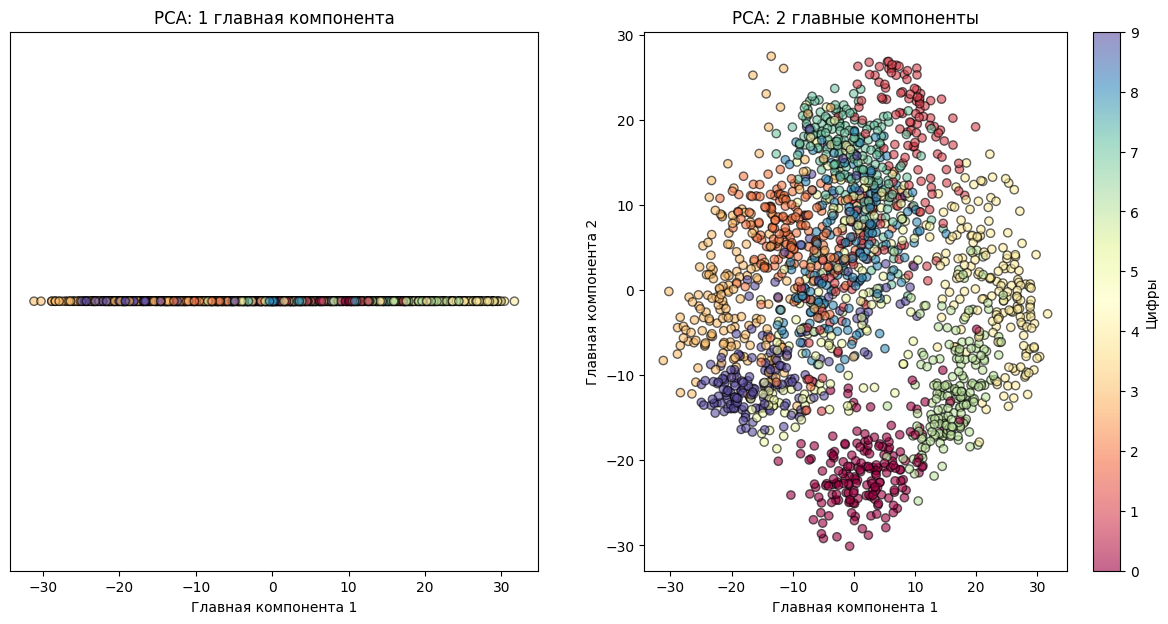

In [5]:
# Применим PCA с одной, двумя и тремя главными компонентами
pca_1 = PCA(n_components=1)
X_pca_1 = pca_1.fit_transform(X)

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

# Визуализируем преобразованные данные с одной и двумя главными компонентами
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
scatter_1 = ax[0].scatter(X_pca_1[:, 0], np.zeros_like(X_pca_1), c=y, cmap='Spectral', edgecolor='k', alpha=0.6)
ax[0].set_title('PCA: 1 главная компонента')
ax[0].set_xlabel('Главная компонента 1')
ax[0].set_yticks([])

scatter_2 = ax[1].scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='Spectral', edgecolor='k', alpha=0.6)
ax[1].set_title('PCA: 2 главные компоненты')
ax[1].set_xlabel('Главная компонента 1')
ax[1].set_ylabel('Главная компонента 2')

# Добавляем цветовую шкалу
plt.colorbar(scatter_2, ax=ax[1], label='Цифры')
plt.show()

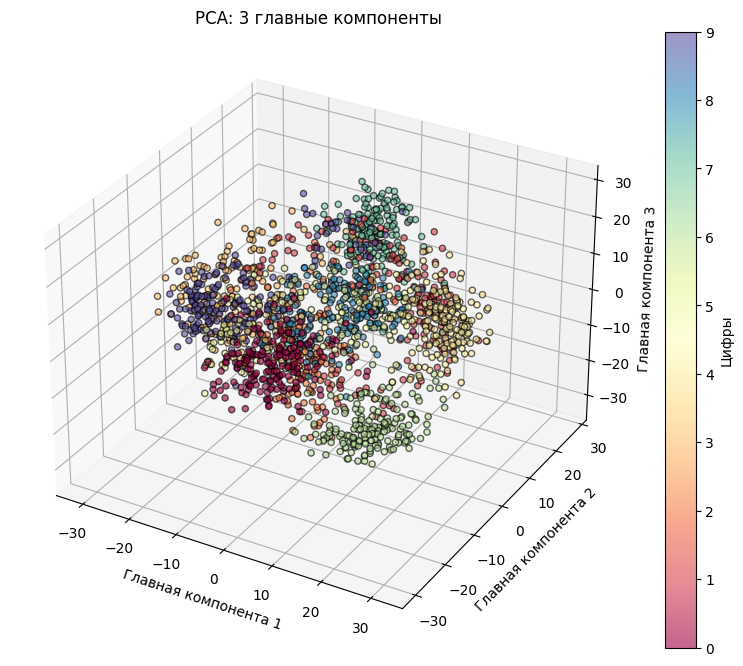

In [6]:
# Визуализация данных с тремя главным компонентами с помощью 3D-графики
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3 = ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=y, cmap='Spectral', edgecolor='k', alpha=0.6)
ax.set_title('PCA: 3 главные компоненты')
ax.set_xlabel('Главная компонента 1')
ax.set_ylabel('Главная компонента 2')
ax.set_zlabel('Главная компонента 3')

plt.colorbar(scatter_3, ax=ax, label='Цифры')
plt.show()

Мы видим, что метод главных компонент (PCA) хорошо разделяет разные цифры в двумерном пространстве, уменьшая количество измерений и сохраняя важную информацию.

### Как SVD и PCA Связаны

1. **Связь через матрицу ковариации**:
   В PCA мы вычисляем собственные векторы ковариационной матрицы $ X^TX $ (где $ X $- центрированные данные). Собственные векторы ковариационной матрицы соответствуют правым сингулярным векторам $ V $ из SVD разложения.
   
   С другой стороны, SVD разлагает матрицу $ X $ напрямую и дает сингулярные векторы $ U $ и $ V $, а также сингулярные значения диагональной матрицы $ \Sigma $. В PCA мы используем $ V $ (собственные векторы ковариационной матрицы) и сингулярные значения для проекции данных на пространство главных компонент.

2. **Упрощение PCA с использованием SVD**:
   На практике PCA можно выполнить с использованием SVD. Если у нас есть матрица данных $ X $, мы можем разложить её с помощью SVD:
     $$
     X = U \Sigma V^T
     $$
     где:
     - $ U $ - матрица левых сингулярных векторов.
     - $ \Sigma $ - диагональная матрица с сингулярными значениями.
     - $ V $ - матрица правых сингулярных векторов.
     
   Главные компоненты данных будут столбцами в $ V $ (правые сингулярные векторы), а проекция данных на первые $ k $ компонент будет равна $ X V[:, :k] $.